In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

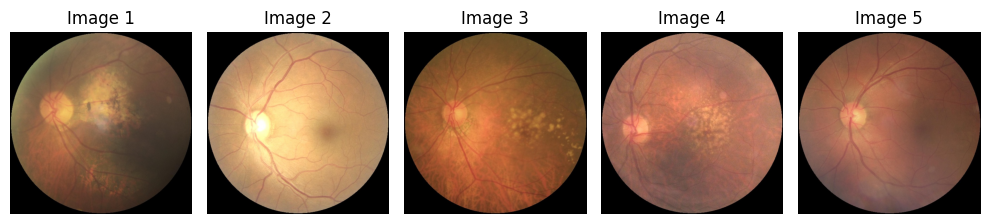

In [ ]:
image_paths = [
    '../resources/238_left.jpg',
    '../resources/416_left.jpg',
    '../resources/1820_left.jpg',
    '../resources/1889_left.jpg',
    '../resources/2427_left.jpg',
]
images = []
for path in image_paths:
    img = cv2.imread(path)
    images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Plot all the images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(f"Image {i + 1}")
plt.tight_layout()
plt.show()

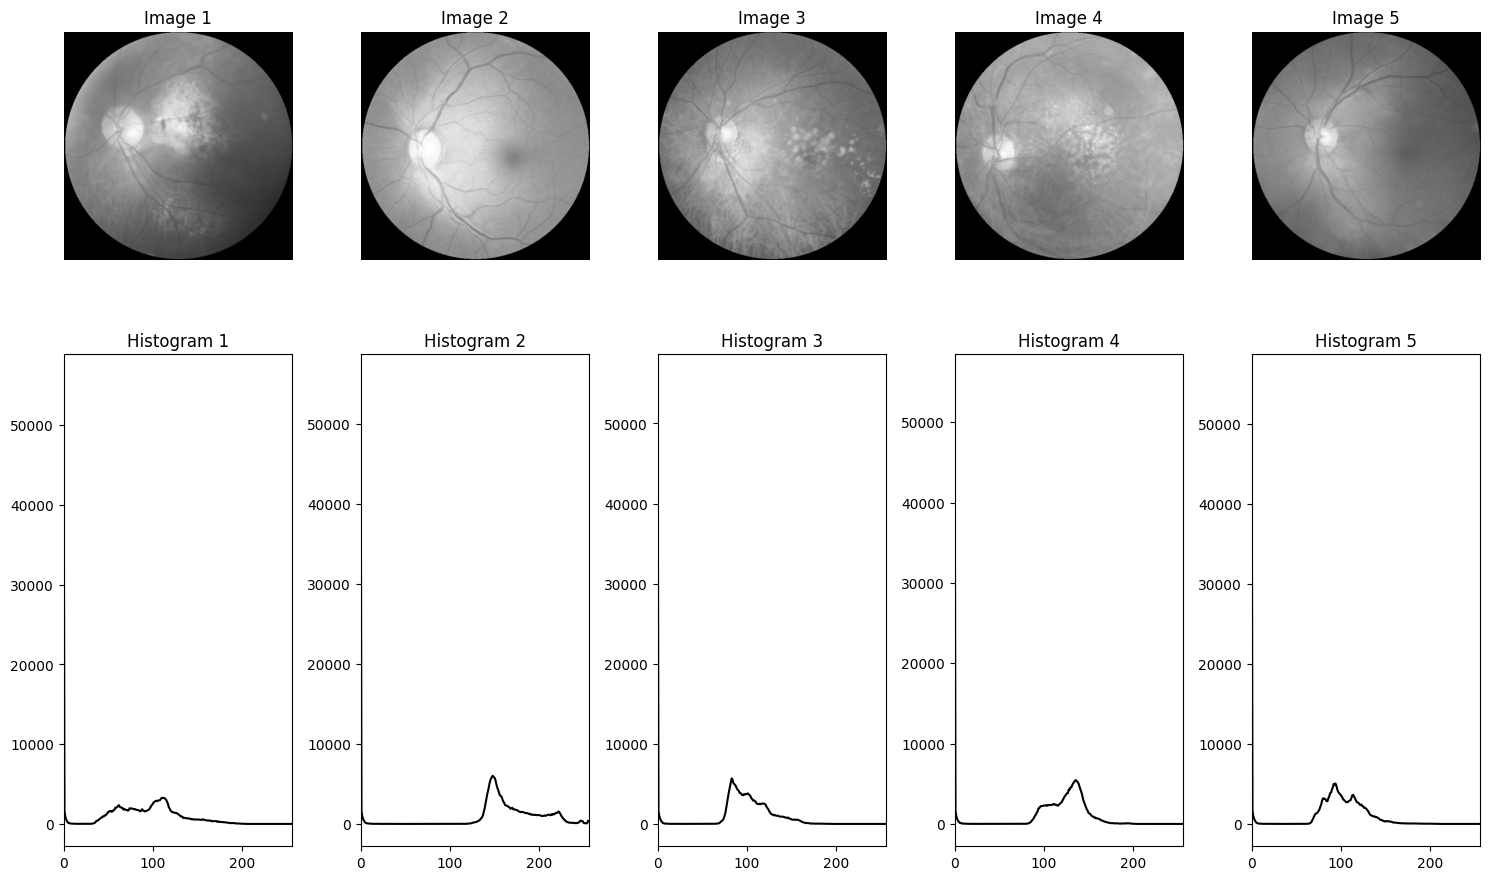

In [ ]:
images = []
for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    images.append(img)
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Image {i + 1}")

    plt.subplot(2, 5, i + 6)
    hist = cv2.calcHist([images[i]], [0], None, [256], [0, 256])  # Calculate histogram
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(f"Histogram {i + 1}")

plt.tight_layout()
plt.show()

**Histogram Equalization**

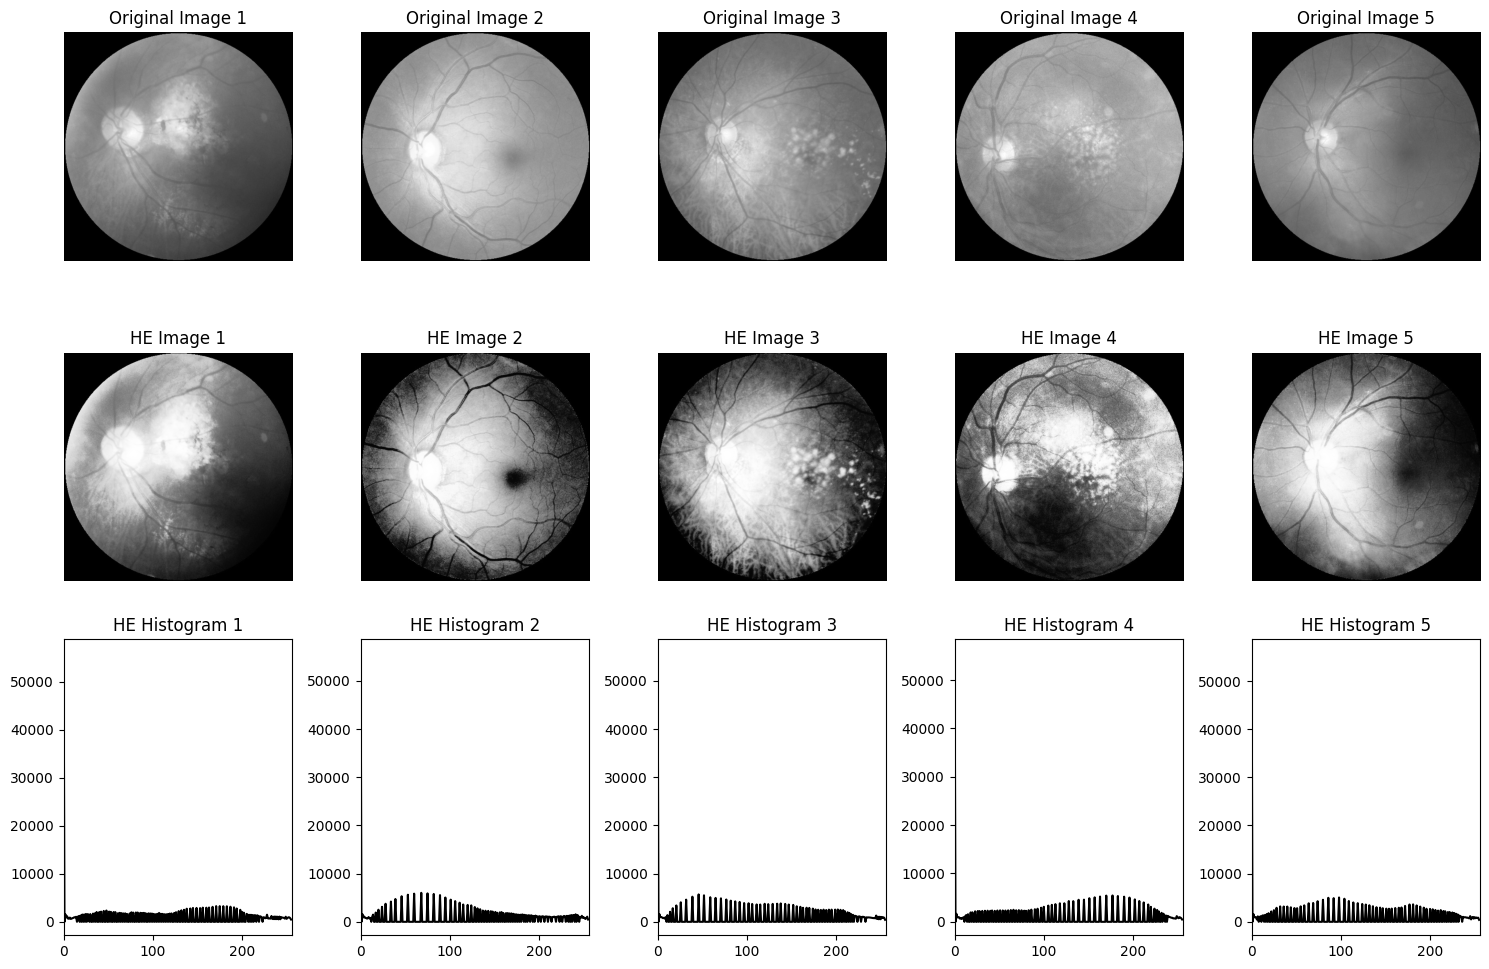

In [ ]:
he_images = []
for img in images:
    he_images.append(cv2.equalizeHist(img))  # Apply HE

# Plot original images and their HE enhanced images, along with histograms
plt.figure(figsize=(15, 10))

for i in range(5):
    # Plot original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Original Image {i + 1}")

    # Plot HE image
    plt.subplot(3, 5, i + 6)
    plt.imshow(he_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"HE Image {i + 1}")

    # Plot HE histogram
    plt.subplot(3, 5, i + 11)
    hist = cv2.calcHist([he_images[i]], [0], None, [256], [0, 256])  # Calculate histogram
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(f"HE Histogram {i + 1}")

plt.tight_layout()
plt.show()

Les images semblent plus nettes et plus détaillées que les originales en raison de l'amélioration du contraste. Les histogrammes montrent une distribution plus étalée, ce qui indique que l'amélioration du contraste redistribue les intensités des pixels sur une gamme plus large.

**Cumulative histogram equalization**

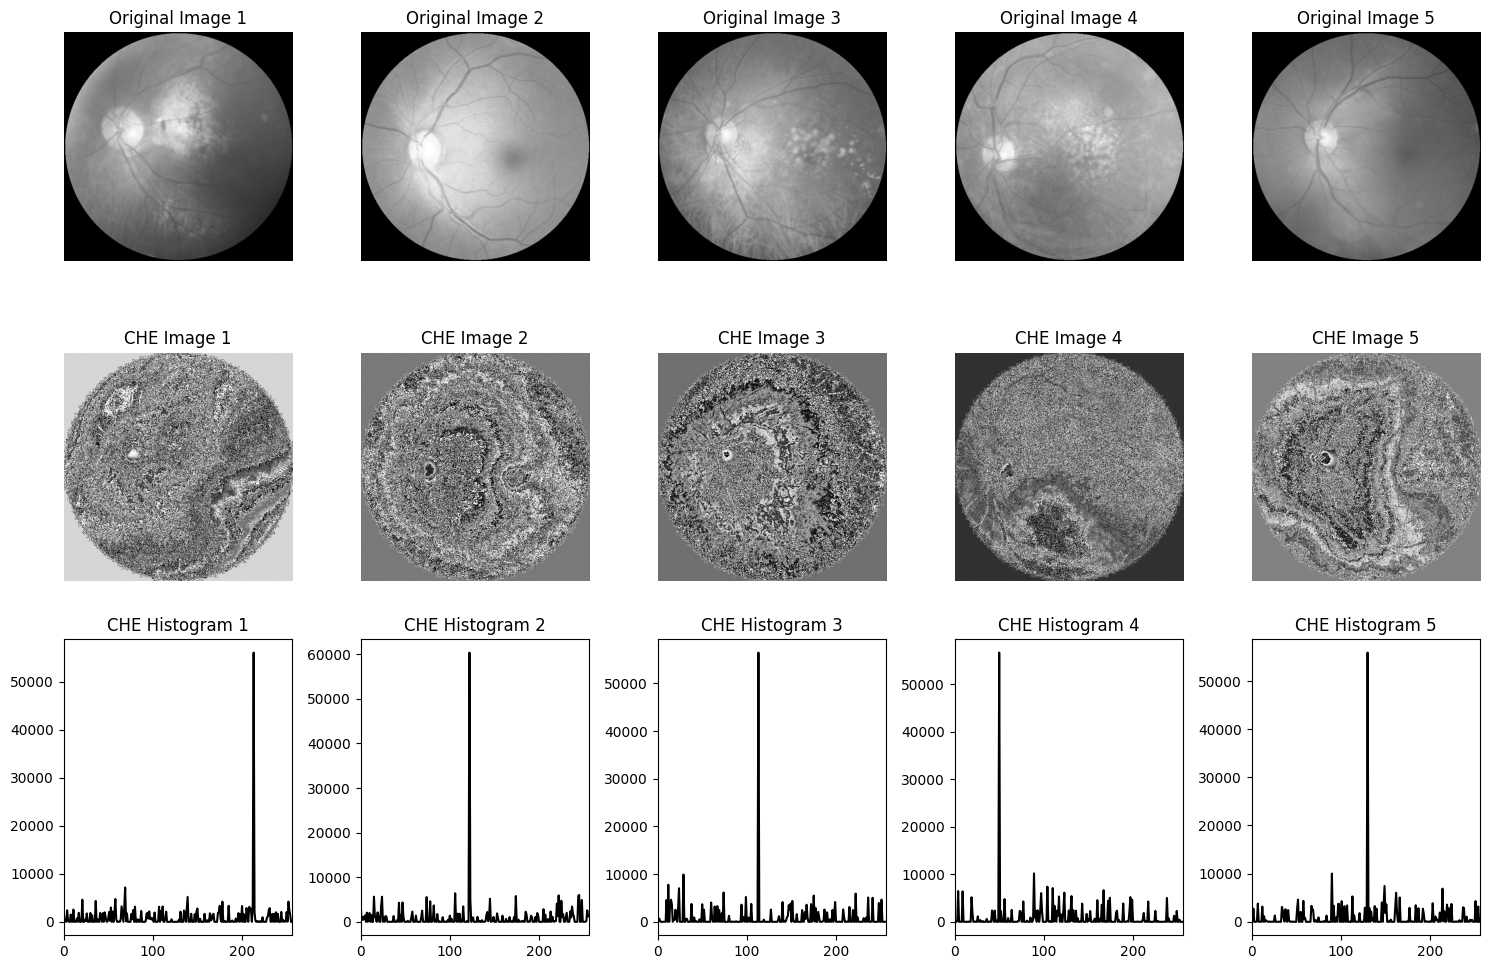

In [ ]:
che_images = []
for img in images:
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    che_img = np.interp(img.flatten(), np.arange(256), cdf_normalized).reshape(img.shape).astype('uint8')
    che_images.append(che_img)

# Plot original and CHE images with their histograms
plt.figure(figsize=(15, 10))

for i in range(5):
    # Plot original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Original Image {i + 1}")

    # Plot CHE image
    plt.subplot(3, 5, i + 6)
    plt.imshow(che_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"CHE Image {i + 1}")

    # Plot CHE histogram
    plt.subplot(3, 5, i + 11)
    hist = cv2.calcHist([che_images[i]], [0], None, [256], [0, 256])  # Calculate histogram
    plt.plot(hist, color='black')
    plt.xlim([0, 256])
    plt.title(f"CHE Histogram {i + 1}")

plt.tight_layout()
plt.show()

**Quadratic Dynamic Histogram Equalization**

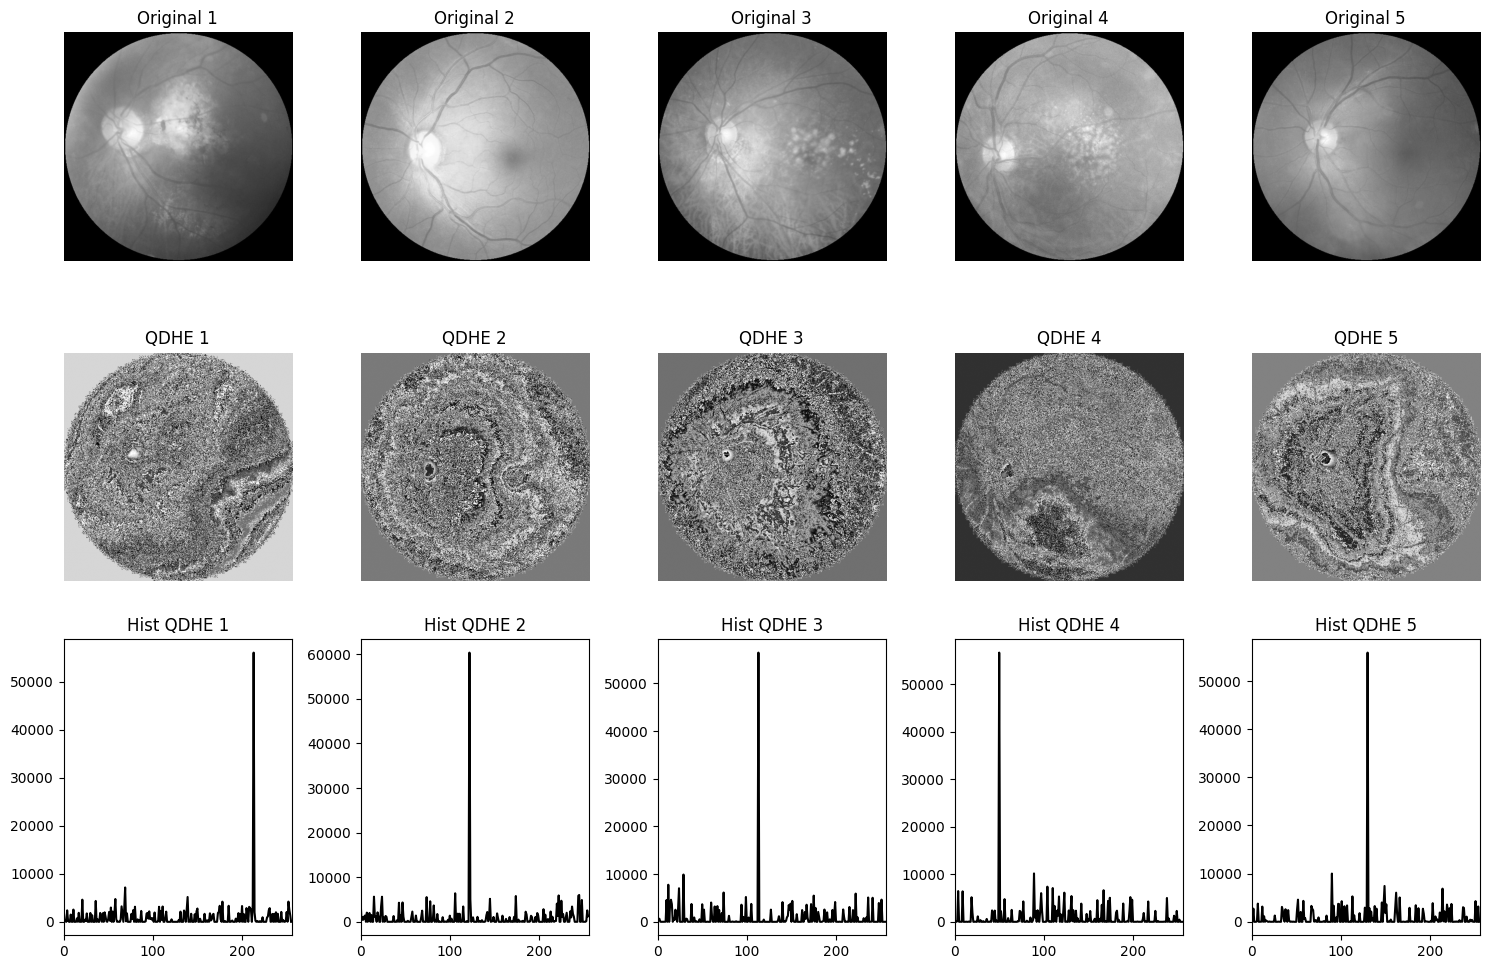

In [9]:
# Fonction pour QDHE
def qdhe(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return equalized.reshape(image.shape).astype(np.uint8)

qdhe_images = [qdhe(img) for img in images]
# Affichage des résultats pour QDHE
plt.figure(figsize=(15, 10))
for i in range(5):
    # Afficher l'image originale
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Original {i+1}")

    # Afficher l'image QDHE
    plt.subplot(3, 5, i + 6)
    plt.imshow(qdhe_images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"QDHE {i+1}")

    # Afficher l'histogramme de QDHE
    plt.subplot(3, 5, i + 11)
    hist = cv2.calcHist([qdhe_images[i]], [0], None, [256], [0, 256])
    plt.plot(hist, color="black")
    plt.xlim([0, 256])
    plt.title(f"Hist QDHE {i+1}")

plt.tight_layout()
plt.show()

La technique QDHE vise à améliorer la visibilité des détails en ajustant l'histogramme de l'image de manière locale. On observe un effet de rehaussement des textures et des structures, rendant plus visibles certaines caractéristiques de la rétine.

Un pic dominant est visible sur chaque histogramme, ce qui pourrait indiquer la présence d'une forte concentration de pixels dans une plage d'intensité spécifique, probablement due à l'algorithme de transformation utilisé.

**Contrast Limited Adaptive Histogram Equalization (CLAHE)**

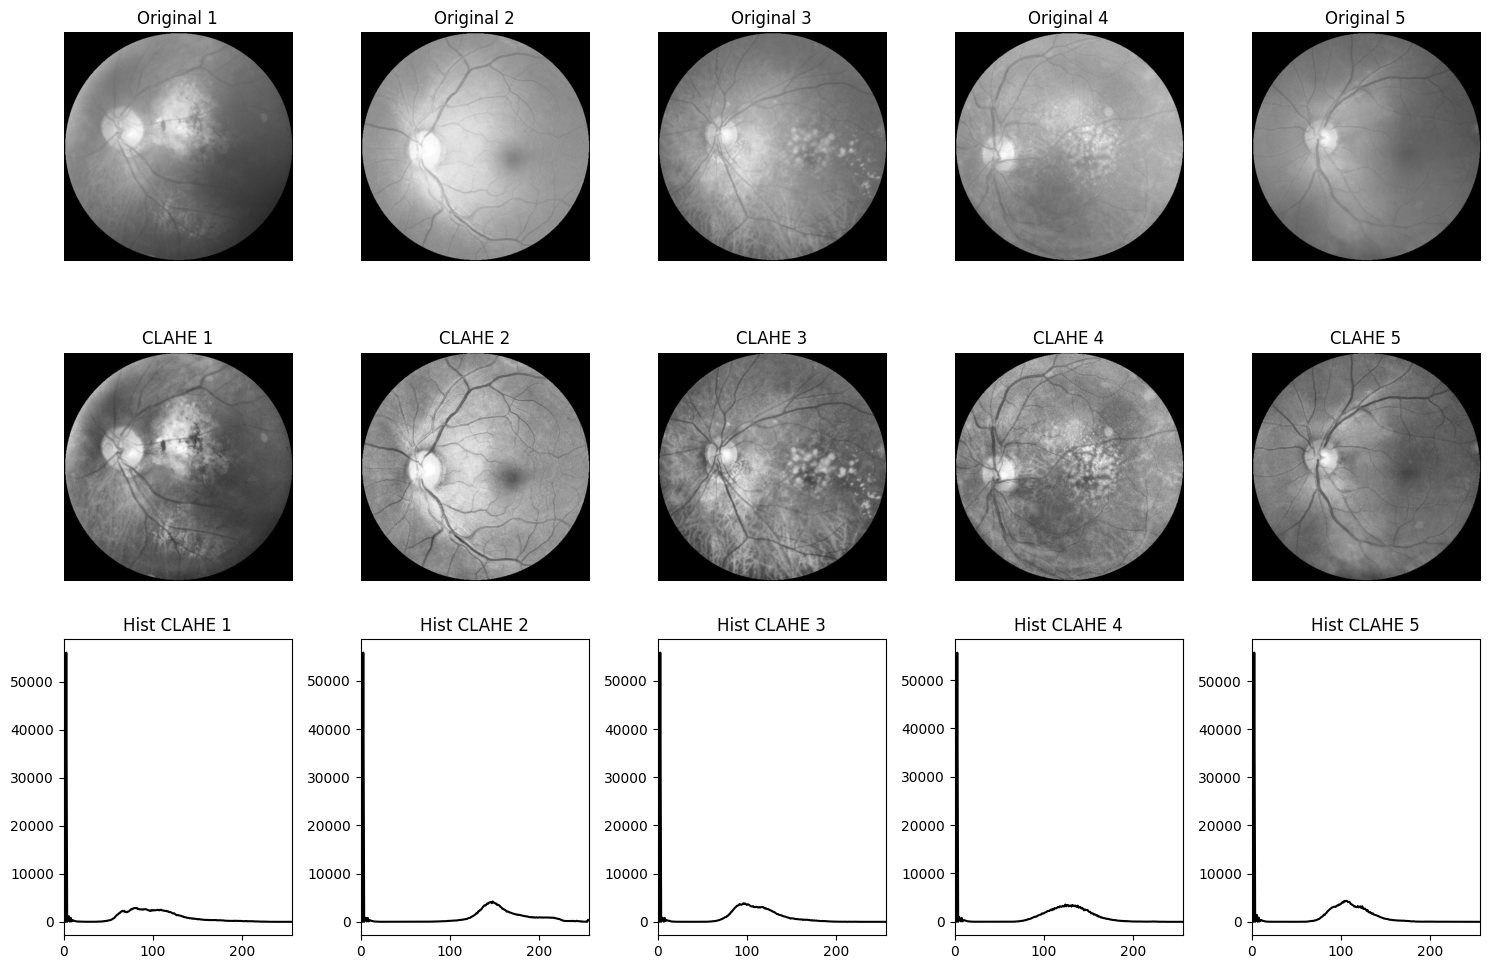

In [10]:
# Application de CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_images = [clahe.apply(img) for img in images]
# Affichage des résultats pour CLAHE
plt.figure(figsize=(15, 10))
for i in range(5):
    # Afficher l'image originale
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Original {i+1}")

    # Afficher l'image CLAHE
    plt.subplot(3, 5, i + 6)
    plt.imshow(clahe_images[i], cmap="gray")
    plt.axis("off")
    plt.title(f"CLAHE {i+1}")

    # Afficher l'histogramme de CLAHE
    plt.subplot(3, 5, i + 11)
    hist = cv2.calcHist([clahe_images[i]], [0], None, [256], [0, 256])
    plt.plot(hist, color="black")
    plt.xlim([0, 256])
    plt.title(f"Hist CLAHE {i+1}")

plt.tight_layout()
plt.show()


Ces images ont été transformées à l'aide de CLAHE, une méthode d'égalisation adaptative de l'histogramme. CLAHE améliore le contraste en divisant l'image en régions plus petites et en ajustant localement l'histogramme.On observe un meilleur contraste des structures rétiniennes comme les vaisseaux sanguins et les lésions.
Contrairement aux histogrammes très discrets du QDHE (image précédente), ceux-ci montrent une répartition plus uniforme des niveaux de gris.On remarque aussi une meilleure répartition des pixels sur toute l'échelle de luminosité, ce qui traduit un contraste plus équilibré.

*Métriques utilisées :*
#

1.   MSE (Mean Squared Error - Erreur quadratique moyenne) :Mesure la différence moyenne entre l'image originale et l'image transformée.Plus MSE est bas, plus l'image transformée est proche de l'originale.

2.   PSNR (Peak Signal-to-Noise Ratio - Rapport signal/bruit de crête) :Exprime la qualité de l'image en décibels (dB).Plus PSNR est élevé, meilleure est la qualité de l'image reconstruite (moins elle est dégradée).


3.   SD (Standard Deviation - Écart type) :Mesure la dispersion des intensités des pixels (contraste de l'image).Un SD plus élevé signifie un contraste plus fort.



In [ ]:
# Fonction pour calculer les métriques
def mse(img1, img2):
    return np.mean((img1 - img2) ** 2)

def psnr(img1, img2):
    mse_value = mse(img1, img2)
    return 20 * np.log10(255 / np.sqrt(mse_value)) if mse_value != 0 else 100

def standard_deviation(img):
    return np.std(img)

# Comparaison des performances
methods = {
    "Original": images,
    "HE": he_images,
    "CHE": che_images,
    "QDHE": qdhe_images,
    "CLAHE": clahe_images
}

# Stocker les résultats des métriques
metrics = {}
for name, img_list in methods.items():
    metrics[name] = {
        "MSE": np.mean([mse(images[i], img_list[i]) for i in range(5)]),
        "PSNR": np.mean([psnr(images[i], img_list[i]) for i in range(5)]),
        "SD": np.mean([standard_deviation(img_list[i]) for i in range(5)])
    }

# Afficher les métriques
for method, values in metrics.items():
    print(f"{method}: MSE={values['MSE']:.2f}, PSNR={values['PSNR']:.2f}, SD={values['SD']:.2f}")


Original: MSE=0.00, PSNR=100.00, SD=55.10
HE: MSE=79.80, PSNR=29.13, SD=83.85
CHE: MSE=106.50, PSNR=27.92, SD=68.61
QDHE: MSE=106.40, PSNR=27.92, SD=68.60
CLAHE: MSE=61.30, PSNR=30.26, SD=55.68


HE donne le contraste le plus fort (SD = 83.85) mais au prix d'une forte altération de l'image (MSE élevé).
#
CHE et QDHE ont un contraste un peu plus modéré que HE mais détériorent davantage la qualité de l'image.

*CLAHE offre un bon compromis :*
- Moins de distorsion (MSE plus bas)
- Meilleure qualité globale (PSNR plus élevé)
- Contraste raisonnablement amélioré sans exagération (SD proche de l'original)